In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
api_data = pd.read_csv("steam_app_data.csv")
api_data

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 146608},NaN,"{'coming_soon': False, 'date': 'Nov 1, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 5886},NaN,"{'coming_soon': False, 'date': 'Apr 1, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 3937},NaN,"{'coming_soon': False, 'date': 'May 1, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 2061},NaN,"{'coming_soon': False, 'date': 'Jun 1, 2001'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
4,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 17997},NaN,"{'coming_soon': False, 'date': 'Nov 1, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,game,Lethal Company,1966720,0.0,False,NaN,NaN,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",A co-op horror about scavenging at abandoned m...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 256961309, 'name': 'Lethal Company - T...",{'total': 261909},NaN,"{'coming_soon': False, 'date': 'Oct 23, 2023'}","{'url': '', 'email': 'zeekerssgames@gmail.com'}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'The game has a reali..."
996,game,Inside the Backrooms,1987080,0.0,False,NaN,NaN,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",Inside the Backrooms is a horror multiplayer g...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adve

In [62]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     999 non-null    object 
 1   name                     1000 non-null   object 
 2   steam_appid              1000 non-null   int64  
 3   required_age             999 non-null    float64
 4   is_free                  999 non-null    object 
 5   controller_support       405 non-null    object 
 6   dlc                      575 non-null    object 
 7   detailed_description     999 non-null    object 
 8   about_the_game           999 non-null    object 
 9   short_description        999 non-null    object 
 10  fullgame                 0 non-null      float64
 11  supported_languages      999 non-null    object 
 12  header_image             999 non-null    object 
 13  website                  882 non-null    object 
 14  pc_requirements          

In [63]:
api_data.isnull().sum()

type                          1
name                          0
steam_appid                   0
required_age                  1
is_free                       1
controller_support          595
dlc                         425
detailed_description          1
about_the_game                1
short_description             1
fullgame                   1000
supported_languages           1
header_image                  1
website                     118
pc_requirements               1
mac_requirements              1
linux_requirements            1
legal_notice                269
drm_notice                  929
ext_user_account_notice     891
developers                    2
publishers                    1
demos                       887
price_overview              276
packages                    204
package_groups                1
platforms                     1
metacritic                  417
reviews                     627
categories                    3
genres                        4
screensh

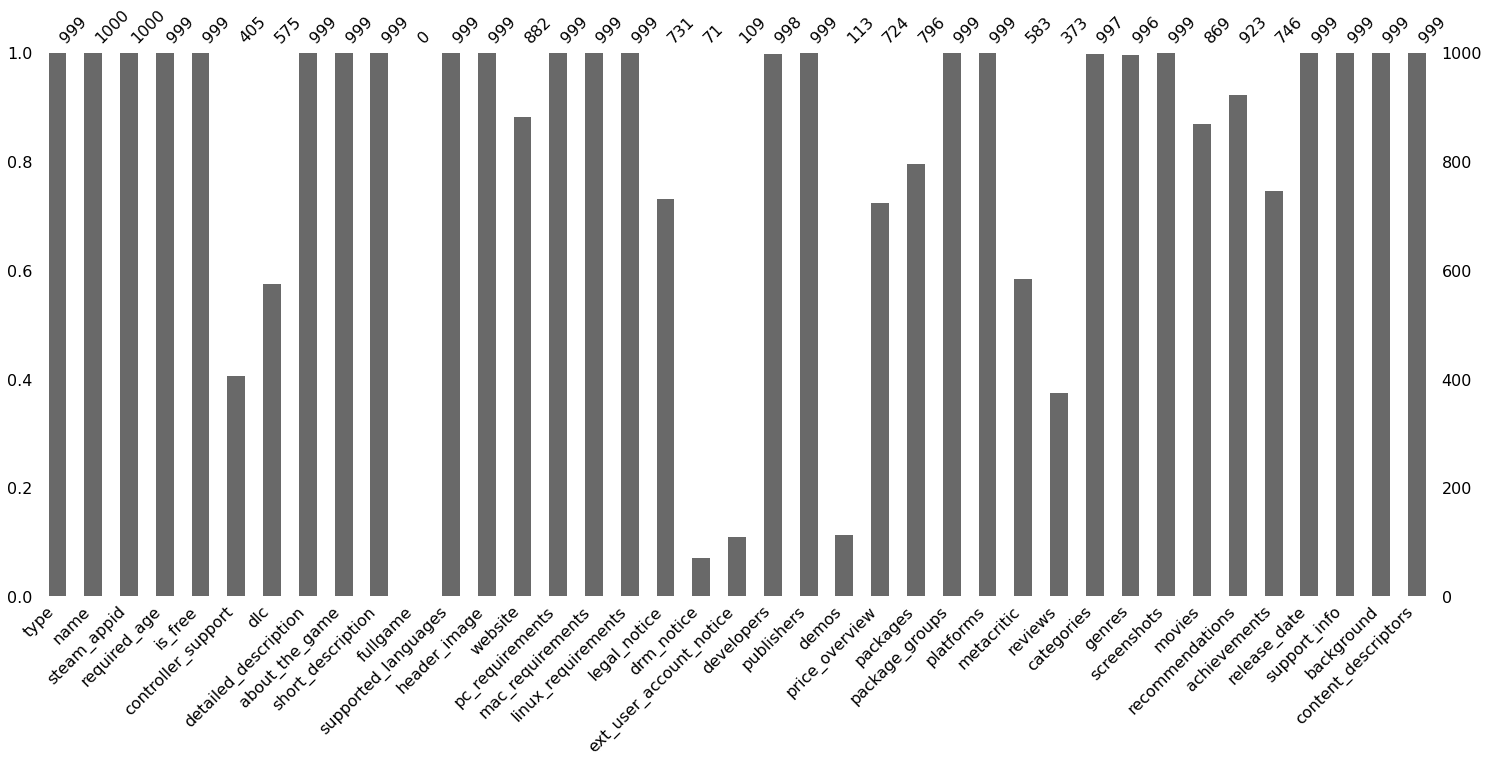

In [64]:
# Total number of missing values is calculated by summing up all the null values in each column(1000 values)
import missingno as msno
msno.bar(api_data)
plt.show()

In [65]:
columns_to_remove = ['fullgame', 'legal_notice', 'ext_user_account_notice', 'demos', 'drm_notice', 'supported_languages','reviews', 'detailed_description', 'about_the_game', 'short_description','fullgame','header_image','packages','package_groups','support_info','movies','release_date','background','content_descriptors']

api_data = api_data.drop(columns_to_remove, axis=1)
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                999 non-null    object 
 1   name                1000 non-null   object 
 2   steam_appid         1000 non-null   int64  
 3   required_age        999 non-null    float64
 4   is_free             999 non-null    object 
 5   controller_support  405 non-null    object 
 6   dlc                 575 non-null    object 
 7   website             882 non-null    object 
 8   pc_requirements     999 non-null    object 
 9   mac_requirements    999 non-null    object 
 10  linux_requirements  999 non-null    object 
 11  developers          998 non-null    object 
 12  publishers          999 non-null    object 
 13  price_overview      724 non-null    object 
 14  platforms           999 non-null    object 
 15  metacritic          583 non-null    object 
 16  categor

In [66]:
api_data['type'].value_counts(dropna=False)

game    999
NaN       1
Name: type, dtype: int64

In [67]:
duplicates_rows = api_data[api_data.duplicated()]
print("number of duplicate rows: ", duplicates_rows.shape[0])
duplicates_rows.head(3)

number of duplicate rows:  8


,type,name,steam_appid,required_age,is_free,controller_support,dlc,website,pc_requirements,mac_requirements,...,developers,publishers,price_overview,platforms,metacritic,categories,genres,screenshots,recommendations,achievements
101,game,F.E.A.R.,21090,17.0,False,NaN,NaN,https://wbgamessupport.wbgames.com/hc/en-us,{'minimum': '<strong>Minimum:</strong><br>\t\t...,[],...,"['Monolith Productions, Inc.', 'Timegate']","['Warner Bros. Games', 'Warner Bros. Interacti...","{'currency': 'USD', 'initial': 5499, 'final': ...","{'windows': True, 'mac': False, 'linux': False}","{'score': 88, 'url': 'https://www.metacritic.c...","[{'id': 2, 'description': 'Single-player'}]","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 9812},NaN
127,game,Sid Meier's Civilization® IV,3900,0.0,False,NaN,NaN,http://www.2kgames.com/civ4/home.htm,{'minimum': '<strong>Minimum:</strong> Windows...,{'minimum': '<strong>Recommended:</strong><br>...,...,['Firaxis Games'],['2K'],"{'currency': 'USD', 'initial': 1999, 'final': ...","{'windows': True, 'mac': True, 'linux': False}","{'score': 94, 'url': 'https://www.metacritic.c...","[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '2', 'description': 'Strategy'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 2248},NaN
149,game,Call of Duty®: Black Ops,42700,17.0,False,NaN,"[42719, 42722, 42718, 42716]",http://www.callofduty.com,"{'minimum': '<ul class=""bb_ul""><li><strong>OS ...",[],...,['Treyarch'],['Activision'],"{'currency': 'USD', 'initial': 3999, 'final': ...","{'windows': True, 'mac': False, 'linux': False}","{'score': 81, 'url': 'https://www.metacritic.c...","[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 17090},"{'total': 68, 'highlighted': [{'name': 'Death ..."


In [68]:
print("Number of rows before dropping duplicates:", api_data.shape[0])
api_data_cleaned = api_data.drop_duplicates()
print("Number of rows after dropping duplicates:", api_data_cleaned.shape[0])

Number of rows before dropping duplicates: 1000
Number of rows after dropping duplicates: 992


In [69]:
api_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                991 non-null    object 
 1   name                992 non-null    object 
 2   steam_appid         992 non-null    int64  
 3   required_age        991 non-null    float64
 4   is_free             991 non-null    object 
 5   controller_support  404 non-null    object 
 6   dlc                 570 non-null    object 
 7   website             874 non-null    object 
 8   pc_requirements     991 non-null    object 
 9   mac_requirements    991 non-null    object 
 10  linux_requirements  991 non-null    object 
 11  developers          990 non-null    object 
 12  publishers          991 non-null    object 
 13  price_overview      716 non-null    object 
 14  platforms           991 non-null    object 
 15  metacritic          577 non-null    object 
 16  categori

In [70]:
api_data_cleaned

,type,name,steam_appid,required_age,is_free,controller_support,dlc,website,pc_requirements,mac_requirements,...,developers,publishers,price_overview,platforms,metacritic,categories,genres,screenshots,recommendations,achievements
0,game,Counter-Strike,10,0.0,False,NaN,NaN,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 999, 'final': 9...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 146608},NaN
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 5886},NaN
2,game,Day of Defeat,30,0.0,False,NaN,NaN,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 3937},NaN
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 2061},NaN
4,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Gearbox Software'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 17997},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,game,Lethal Company,1966720,0.0,False,NaN,NaN,NaN,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,['Zeekerss'],['Zeekerss'],"{'currency': 'USD', 'initial': 999, 'final': 9...","{'windows': True, 'mac': False, 'linux': False}",NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 261909},NaN
996,game,Inside the Backrooms,1987080,0.0,False,NaN,NaN,NaN,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,['MrFatcat'],"['MrFatcat', 'Dropsiick']","{'currency': 'USD', 'initial': 699, 'final': 6...","{'windows': True, 'mac': False, 'linux': False}",NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 33706},"{'total': 26, 'highlighted': [{'name': 'INSIDE..."
997,game,Resident Evil 4,2050650,17.0,False,full,"[2109300, 2593600, 2109315, 2109301, 2109303, ...",https://www.residentevil.com/re4/,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,"['CAPCOM Co., Ltd.']","['CAPCOM Co., Ltd.']","{'currency': 'USD', 'initial': 5999, 'final

In [71]:
columns_to_fillna = ['controller_support', 'dlc', 'website', 'price_overview',
                     'metacritic', 'recommendations', 'achievements']
api_data_cleaned[columns_to_fillna] = api_data_cleaned[columns_to_fillna].fillna('')
api_data_cleaned

C:\Users\prani\AppData\Local\Temp\ipykernel_15672\3609920678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_data_cleaned[columns_to_fillna] = api_data_cleaned[columns_to_fillna].fillna('')


,type,name,steam_appid,required_age,is_free,controller_support,dlc,website,pc_requirements,mac_requirements,...,developers,publishers,price_overview,platforms,metacritic,categories,genres,screenshots,recommendations,achievements
0,game,Counter-Strike,10,0.0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 999, 'final': 9...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 146608},
1,game,Team Fortress Classic,20,0.0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 5886},
2,game,Day of Defeat,30,0.0,False,,,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 3937},
3,game,Deathmatch Classic,40,0.0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 2061},
4,game,Half-Life: Opposing Force,50,0.0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Gearbox Software'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 17997},
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,game,Lethal Company,1966720,0.0,False,,,,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,['Zeekerss'],['Zeekerss'],"{'currency': 'USD', 'initial': 999, 'final': 9...","{'windows': True, 'mac': False, 'linux': False}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 261909},
996,game,Inside the Backrooms,1987080,0.0,False,,,,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,['MrFatcat'],"['MrFatcat', 'Dropsiick']","{'currency': 'USD', 'initial': 699, 'final': 6...","{'windows': True, 'mac': False, 'linux': False}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 33706},"{'total': 26, 'highlighted': [{'name': 'INSIDE..."
997,game,Resident Evil 4,2050650,17.0,False,full,"[2109300, 2593600, 2109315, 2109301, 2109303, ...",https://www.residentevil.com/re4/,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,"['CAPCOM Co., Ltd.']","['CAPCOM Co., Ltd.']","{'currency': 'USD', 'initial': 5999, 'final': ...","{'windows': True, 'mac': False, 'linux': False}","{'score': 91, 'url': 'https://www.

In [72]:
api_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                991 non-null    object 
 1   name                992 non-null    object 
 2   steam_appid         992 non-null    int64  
 3   required_age        991 non-null    float64
 4   is_free             991 non-null    object 
 5   controller_support  992 non-null    object 
 6   dlc                 992 non-null    object 
 7   website             992 non-null    object 
 8   pc_requirements     991 non-null    object 
 9   mac_requirements    991 non-null    object 
 10  linux_requirements  991 non-null    object 
 11  developers          990 non-null    object 
 12  publishers          991 non-null    object 
 13  price_overview      992 non-null    object 
 14  platforms           991 non-null    object 
 15  metacritic          992 non-null    object 
 16  categori

In [73]:
api_data_cleaned['required_age'].value_counts(dropna=False).sort_index()

0.0     734
1.0       1
12.0      3
13.0     12
15.0      2
16.0     12
17.0    203
18.0     24
NaN       1
Name: required_age, dtype: int64

In [74]:
# Writing this to disect the age column
def process_age(api_data_cleaned):
    cut = [ -1, 0, 3, 7, 12, 16, 2000]
    label = [0, 4, 7, 13, 16, 18]
    
    api_data_cleaned['required_age'] = pd.cut(api_data_cleaned['required_age'], bins=cut, labels=label)
    return api_data_cleaned
age_df = process_age(api_data_cleaned)
age_df['required_age'].value_counts().sort_index()

C:\Users\prani\AppData\Local\Temp\ipykernel_15672\3844950589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_data_cleaned['required_age'] = pd.cut(api_data_cleaned['required_age'], bins=cut, labels=label)


0     734
4       1
7       0
13      3
16     26
18    227
Name: required_age, dtype: int64

In [75]:
age_df

,type,name,steam_appid,required_age,is_free,controller_support,dlc,website,pc_requirements,mac_requirements,...,developers,publishers,price_overview,platforms,metacritic,categories,genres,screenshots,recommendations,achievements
0,game,Counter-Strike,10,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 999, 'final': 9...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 146608},
1,game,Team Fortress Classic,20,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 5886},
2,game,Day of Defeat,30,0,False,,,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 3937},
3,game,Deathmatch Classic,40,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 2061},
4,game,Half-Life: Opposing Force,50,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Gearbox Software'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 17997},
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,game,Lethal Company,1966720,0,False,,,,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,['Zeekerss'],['Zeekerss'],"{'currency': 'USD', 'initial': 999, 'final': 9...","{'windows': True, 'mac': False, 'linux': False}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 261909},
996,game,Inside the Backrooms,1987080,0,False,,,,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,['MrFatcat'],"['MrFatcat', 'Dropsiick']","{'currency': 'USD', 'initial': 699, 'final': 6...","{'windows': True, 'mac': False, 'linux': False}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 33706},"{'total': 26, 'highlighted': [{'name': 'INSIDE..."
997,game,Resident Evil 4,2050650,18,False,full,"[2109300, 2593600, 2109315, 2109301, 2109303, ...",https://www.residentevil.com/re4/,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,"['CAPCOM Co., Ltd.']","['CAPCOM Co., Ltd.']","{'currency': 'USD', 'initial': 5999, 'final': ...","{'windows': True, 'mac': False, 'linux': False}","{'score': 91, 'url': 'https://www.metacritic.c..."

In [76]:
age_df['platforms'].head()

0    {'windows': True, 'mac': True, 'linux': True}
1    {'windows': True, 'mac': True, 'linux': True}
2    {'windows': True, 'mac': True, 'linux': True}
3    {'windows': True, 'mac': True, 'linux': True}
4    {'windows': True, 'mac': True, 'linux': True}
Name: platforms, dtype: object

In [77]:
age_df['platforms']

0        {'windows': True, 'mac': True, 'linux': True}
1        {'windows': True, 'mac': True, 'linux': True}
2        {'windows': True, 'mac': True, 'linux': True}
3        {'windows': True, 'mac': True, 'linux': True}
4        {'windows': True, 'mac': True, 'linux': True}
                            ...                       
995    {'windows': True, 'mac': False, 'linux': False}
996    {'windows': True, 'mac': False, 'linux': False}
997    {'windows': True, 'mac': False, 'linux': False}
998      {'windows': True, 'mac': True, 'linux': True}
999    {'windows': True, 'mac': False, 'linux': False}
Name: platforms, Length: 992, dtype: object

In [78]:
age_df

,type,name,steam_appid,required_age,is_free,controller_support,dlc,website,pc_requirements,mac_requirements,...,developers,publishers,price_overview,platforms,metacritic,categories,genres,screenshots,recommendations,achievements
0,game,Counter-Strike,10,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 999, 'final': 9...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 146608},
1,game,Team Fortress Classic,20,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 5886},
2,game,Day of Defeat,30,0,False,,,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 3937},
3,game,Deathmatch Classic,40,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 2061},
4,game,Half-Life: Opposing Force,50,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Gearbox Software'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 17997},
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,game,Lethal Company,1966720,0,False,,,,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,['Zeekerss'],['Zeekerss'],"{'currency': 'USD', 'initial': 999, 'final': 9...","{'windows': True, 'mac': False, 'linux': False}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 261909},
996,game,Inside the Backrooms,1987080,0,False,,,,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,['MrFatcat'],"['MrFatcat', 'Dropsiick']","{'currency': 'USD', 'initial': 699, 'final': 6...","{'windows': True, 'mac': False, 'linux': False}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 33706},"{'total': 26, 'highlighted': [{'name': 'INSIDE..."
997,game,Resident Evil 4,2050650,18,False,full,"[2109300, 2593600, 2109315, 2109301, 2109303, ...",https://www.residentevil.com/re4/,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,"['CAPCOM Co., Ltd.']","['CAPCOM Co., Ltd.']","{'currency': 'USD', 'initial': 5999, 'final': ...","{'windows': True, 'mac': False, 'linux': False}","{'score': 91, 'url': 'https://www.metacritic.c..."

In [79]:
age_df.to_csv("api_data_cleaned.csv")

In [82]:
age_df.isnull().sum()

type                  1
name                  0
steam_appid           0
required_age          1
is_free               1
controller_support    0
dlc                   0
website               0
pc_requirements       1
mac_requirements      1
linux_requirements    1
developers            2
publishers            1
price_overview        0
platforms             1
metacritic            0
categories            3
genres                4
screenshots           1
recommendations       0
achievements          0
dtype: int64

In [83]:
age_df['required_age'] = age_df['required_age'].fillna(0).astype(int)

C:\Users\prani\AppData\Local\Temp\ipykernel_15672\410508994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['required_age'] = age_df['required_age'].fillna(0).astype(int)


In [84]:
age_df

,type,name,steam_appid,required_age,is_free,controller_support,dlc,website,pc_requirements,mac_requirements,...,developers,publishers,price_overview,platforms,metacritic,categories,genres,screenshots,recommendations,achievements
0,game,Counter-Strike,10,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 999, 'final': 9...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 146608},
1,game,Team Fortress Classic,20,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 5886},
2,game,Day of Defeat,30,0,False,,,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 3937},
3,game,Deathmatch Classic,40,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 2061},
4,game,Half-Life: Opposing Force,50,0,False,,,,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Gearbox Software'],['Valve'],"{'currency': 'USD', 'initial': 499, 'final': 4...","{'windows': True, 'mac': True, 'linux': True}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 17997},
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,game,Lethal Company,1966720,0,False,,,,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,['Zeekerss'],['Zeekerss'],"{'currency': 'USD', 'initial': 999, 'final': 9...","{'windows': True, 'mac': False, 'linux': False}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 261909},
996,game,Inside the Backrooms,1987080,0,False,,,,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,['MrFatcat'],"['MrFatcat', 'Dropsiick']","{'currency': 'USD', 'initial': 699, 'final': 6...","{'windows': True, 'mac': False, 'linux': False}",,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",{'total': 33706},"{'total': 26, 'highlighted': [{'name': 'INSIDE..."
997,game,Resident Evil 4,2050650,18,False,full,"[2109300, 2593600, 2109315, 2109301, 2109303, ...",https://www.residentevil.com/re4/,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,"['CAPCOM Co., Ltd.']","['CAPCOM Co., Ltd.']","{'currency': 'USD', 'initial': 5999, 'final': ...","{'windows': True, 'mac': False, 'linux': False}","{'score': 91, 'url': 'https://www.metacritic.c..."